In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame

In [11]:
df=pd.read_csv("C:\\Users\\sanket\\Desktop\\Zomato data  (1).csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the datatype of column - rate

In [12]:
def handleRate(value):
    value=str(value).split('/')# split-remove the /
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of restaurant 

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of restaurant')

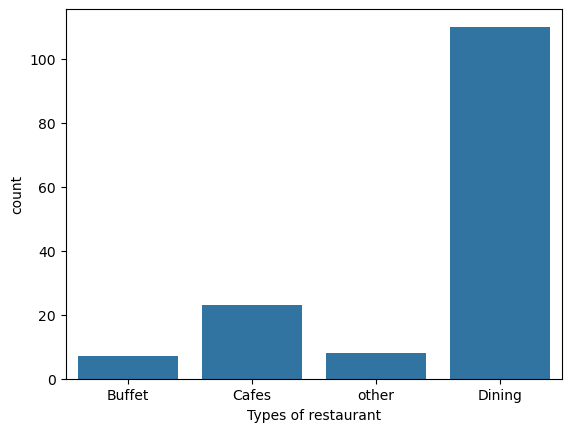

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of restaurant")

#  Conclusion: The majority of the restaurants falls into the dining category.

Text(0, 0.5, 'Votes')

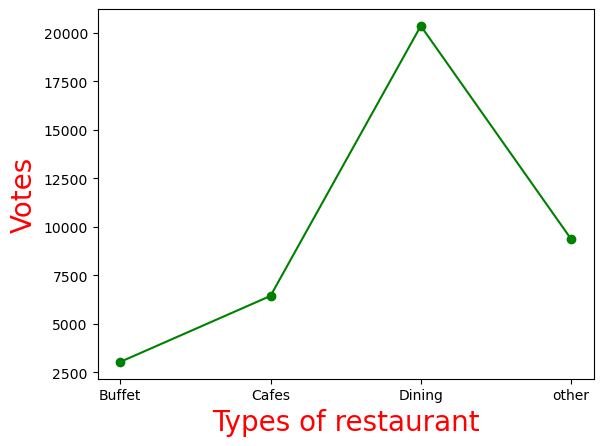

In [18]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of restaurant',c='red',size=20)
plt.ylabel('Votes',c='red',size=20)


# Conclusion- Dining restaurant  has recived maximum votes.

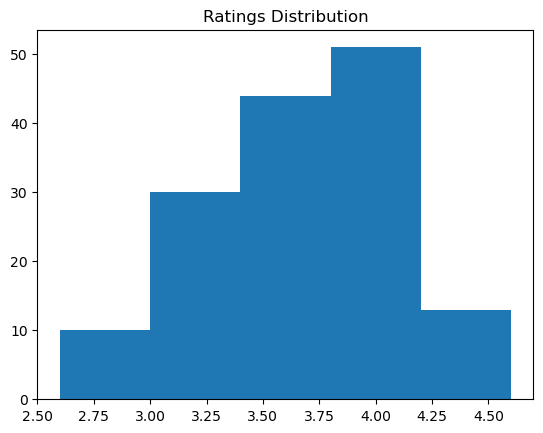

In [22]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

# Conclusion: The majority restaurant  recived ratings from 3.5 to 4.

In [23]:
# Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

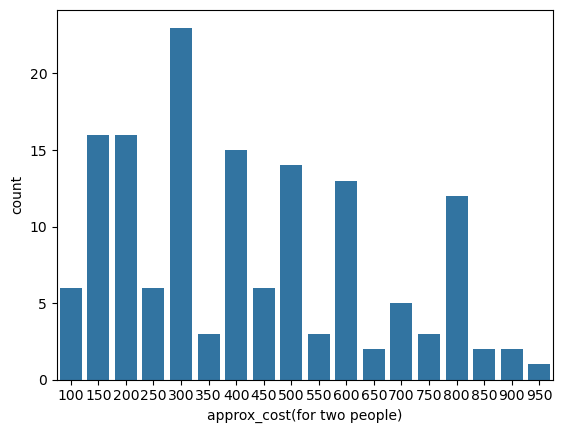

In [24]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion:The majority of couples prefer restaurant  with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

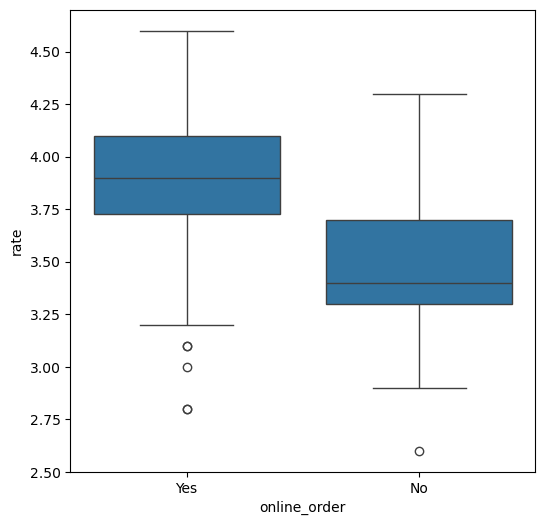

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)


# Conclusion: Offline order received lower rating in comparision to online order.

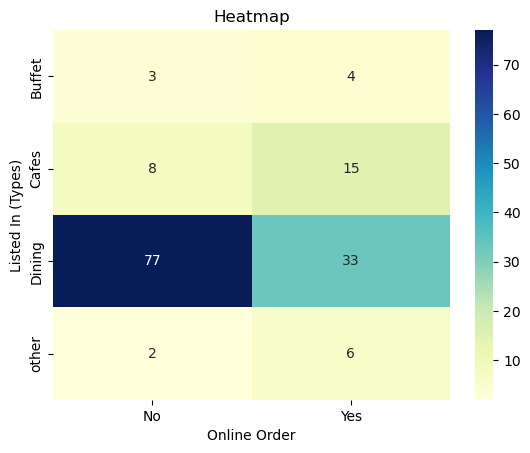

In [26]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
# annot it shows the correlation
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Types)')
plt.show()


# Conclusion:
## Dining restaurant  primarily accept offline orders whereas cafes primarily recevied online orders.This suggests that clients preferred orders in person at restaurants,but prefer online ordering at cafes.